## Importing Libraries Required

In [1]:
import numpy as np
import pandas as pd
import pydotplus
from sklearn import datasets
import math

## Importing the 'Iris Dataset'

In [2]:
data = datasets.load_iris()

## Images for better clarity

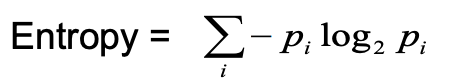

### Splitting can be of 2 types
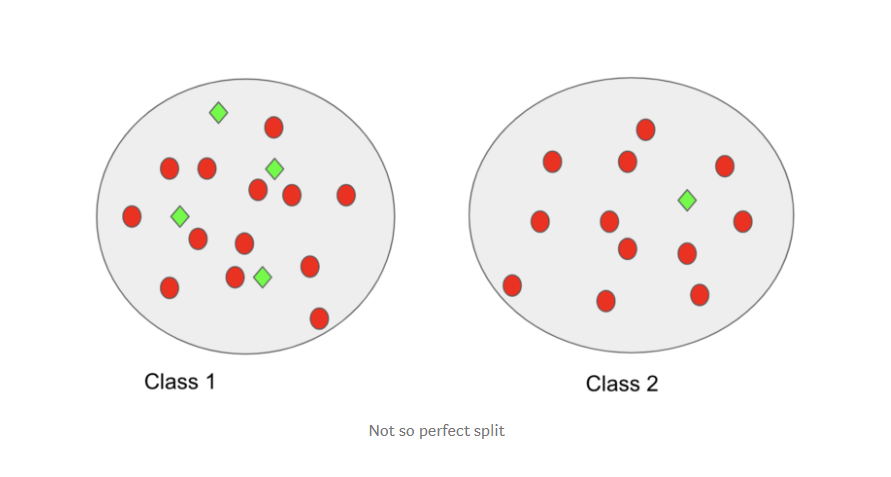

## and

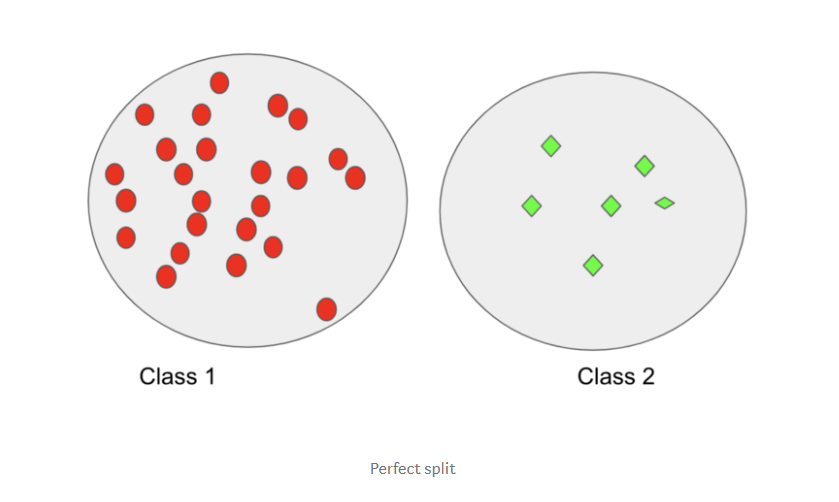

## Creating class TreeNode

In [3]:
class TreeNode:
    
    def __init__(self,data,output):
        
        
        '''
        This returns the root of our decision tree when its built.
        'TreeNode' is a class which stores data, children, output, index
        
        1. data: data represents the feature upon which the node was split when fitting the training data, data = None
                 for leaf node.
        2. children : This is a dictionary which stores the key: value pairs where key represents the feature to be split
                       and value represents the corresponding child TreeNode
        3. output : output represents the class with current majority at this instance of the decision tree
        4. index : index is a unique index given to every node
        '''    
        self.data = data
        self.children = {}
        self.output = output
        self.index = -1
    
    # We will have another functionality of adding a child to this TreeNode
    def add_child(self,feature_value,obj):
        
        # this functionality is used to add children to the dictionary
        self.children[feature_value] = obj

## Creating Class of our classifier

In [4]:
class DecisionTreeClassifier:
    
    # Defining the __init__ function
    def __init__(self):
        self.__root = None                     # Here root represents the root node after building our tree
        
    def ___Count_unique(self, y):
        #  returns a dictionary with keys as unique values of
        # Y(i.e no of classes) and the corresponding value as its frequency
        d = {}
        for i in y:
            if i in d:
                d[i] += 1
            else:
                d[i] = 1
        return d
    
    def __entropy(self, y):
        # Returns the entropy at current y passed
        
        freq_map = self.___Count_unique(y)
        
        # Assigning current entropy to be zero
        entropy_ = 0
        
        # Total = how many values are there in y
        total = len(y)
        
        # Iterating through freq_map where key is the distinct class and its value is the freq of it
        for i in freq_map:
            prob = freq_map[i]/total
            entropy_ += (-prob)*math.log2(prob)
        return entropy_
    
    
    
    def __Gain_ratio(self,x, y, f):
        '''
        Step 1: Find original Info
        step 2: Find Info(f)
                - Info(f) is the summation of all (D(i)/D)*(entropy of D(i))
        Step 3: Information Gain (Info(g)) = Info(origianl) - Info(f)
        step 4: Split info (split(info)) = summation of all (D(i)/D)*(math.log2(current_size/initial_size))
        '''
        
        info_orignal = self.__entropy(y)  # Before splitting
        info_f = 0                              # after splitting (initial value = 0)
        split_info = 0                          # Initial value = 0
        values = set(x[:,f])
        
        # Creating a datframe in X
        df = pd.DataFrame(x)
        
        #adding y as the last column
        df[df.shape[1]] = y
        
        initial_size = df.shape[0]
        
        # Iterating through all unique values in our 'f' feature:
        for uniq_val in values:
            df1 = df[df[f] == uniq_val]  # Creating another DataFrame with just our uniq value of our selected feature
            current_size = df1.shape[0]
            info_f += (current_size/initial_size)*self.__entropy(df1[df1.shape[1]-1])
            split_info += (-current_size/initial_size)*math.log2(current_size/initial_size)
            
        # In case our split_info is 0, to avoid divide by zero error
        if split_info == 0:
            return math.inf
        
        info_gain = info_orignal - info_f
        gain_ratio = info_gain/split_info
        
        return gain_ratio
    
    
    
    def __Gini_index(self,y):
        # returns the gini index 
        freq_map = self.___Count_unique(y)
        gini_index_ = 1
        total = len(y)
        for i in freq_map:
            p = freq_map[i]/total
            gini_index_ -= p**2
        return gini_index_
    
    def __Gini_gain(self,x, y, f):
        gini_orig = self.__Gini_index(y)
        gini_split_f = 0
        values = set(x[:,f])
        df = pd.DataFrame(x)
        # Adding Y values as the last column in the dataframe 
        df[df.shape[1]] = y
        initial_size = df.shape[0]
        
        for i in values:
            df1 = df[df[f] == i]
            current_size = df1.shape[0]
            gini_split_f += (current_size/initial_size)*self.__Gini_index(df1[df1.shape[1]-1])
        gini_gain_ = gini_orig - gini_split_f
        return gini_gain_

    
    # Defining __decision_tree function
    def __decision_tree(self,x, y, features, metric, classes, level):
        
        '''
        This is a recursive function so we will implement the main case first and then take a look at our base cases
        '''
       
        # If the node consists of only 1 class
        if len(set(y)) == 1:
            print("Level",level)
            output = None
            for i in classes:
                if i in y:
                    output = i
                    print("Count of",i,"=",len(y))
                else :
                    print("Count of",i,"=",0)
            if metric == "gain_ratio":
                print("Current Entropy is =  0.0")
            elif metric == "gini_index":
                print("Current Gini Index is =  0.0")

            print("Reached leaf Node")
            print()
            return TreeNode(None,output)
        
        # If we have run out of features to split upon
        # In this case we will output the class with maximum count
        if len(features) == 0:
            print("Level",level)
            freq_map = self.__count_unique(y)
            output = None
            max_count = -math.inf
            for i in classes:
                if i not in freq_map:
                    print("Count of",i,"=",0)
                else :
                    if freq_map[i] > max_count :
                        output = i
                        max_count = freq_map[i]
                    print("Count of",i,"=",freq_map[i])

            if metric == "gain_ratio":
                print("Current Entropy  is =",self.__entropy(y))
            elif metric == "gini_index":
                print("Current Gini Index is =",self.__Gini_index(y))            

            print("Reached leaf Node")
            print()
            return TreeNode(None,output)
        
        # Main Loop: Finding the best feature to split upon
        max_gain = -math.inf
        final_feature = None
        
        #Iterating through all features
        for f in features:
            if metric == 'Gain_ratio':
                current_gain = self.__Gain_ratio(x, y, f)
            elif metric == 'Gini_index':
                current_gain = self.__Gini_gain(x, y, f)
            
            # Now we have our gain for one feature f
            if current_gain > max_gain:
                max_gain = current_gain
                final_feature = f
        
        print("Level", level)
        freq_map = self.___Count_unique(y)
        output = None
        max_count = -math.inf
        
        for i in classes:
            if i not in freq_map:
                print("Count of",i,"= 0")
            else:
                if freq_map[i] > max_count:
                    output = i
                    max_count = freq_map[i]
                print("Count of",i,"=",freq_map[i])
        
        if metric == 'Gain_ratio':
            print("Current Entropy is",self.__entropy(y))
            print("Splitting on feature X[",final_feature,"] with Gain ratio ",max_gain,sep = '')
            print()
        elif metric == 'Gini_index':
            print("Current Gini Index is =",self.__Gini_index(y))
            print("Splitting on feature  X[",final_feature,"] with gini gain ",max_gain,sep="")
            print()
        
        unique_values = set(x[:,final_feature]) # unique_values represents the unique values of the feature selected
        df = pd.DataFrame(x)
        # Adding Y values as the last column in the dataframe
        df[df.shape[1]] = y

        current_node = TreeNode(final_feature,output)
        
        # Now removing the selected feature from the list as we do not want to
        # split on one feature more than once(in a given root to leaf node path)
        index  = features.index(final_feature)
        features.remove(final_feature)
        
        for i in unique_values:
            # Creating a new dataframe with value of selected feature = i
            df1 = df[df[final_feature] == i]
            # Segregating the X and Y values and recursively calling on the splits
            node = self.__decision_tree(df1.iloc[:,0:df1.shape[1]-1].values,df1.iloc[:,df1.shape[1]-1].values,
                                        features,metric,classes,level+1)
            current_node.add_child(i,node)

        # Add the removed feature     
        features.insert(index,final_feature)

        return current_node
    

    # Defining the Main function 'fit':
    def fit(self,x, y, metric = 'Gini_index'):
        
        '''
        X: This represents the training values upon which we will split
        Y: This represents the target values or our classes 
        metric: This is the metric to be used while splitting, by default it is Gini Index
        '''
        # Creating an array 'features' which has the number of features
        features = [i for i in range(len(x[0]))]
        
        # Creating set classes which contains unique values from target y
        classes = set(y)
        
        # Because we are root node, initial level = 0
        level = 0
        
        # If metric passed is incoorect, assuming default as gain_ratio
        if metric != 'Gini_index':
            if metric != 'Gain_ratio':
                metric = 'Gain_ratio'
        # Now we will split and fit the function on root node
        self.__root = self.__decision_tree(x, y, features, metric, classes, level)
    
    
    def __predict_for(self,data,node):
        # predicts the class for a given testing point and returns the answer
        
        # We have reached a leaf node
        if len(node.children) == 0 :
            return node.output

        val = data[node.data] # represents the value of feature on which the split was made       
        if val not in node.children :
            return node.output
        
        # Recursively call on the splits
        return self.__predict_for(data,node.children[val])

    def predict(self,x):
        # This function returns Y predicted
        # X should be a 2-D np array
        Y = np.array([0 for i in range(len(x))])
        for i in range(len(x)):
            Y[i] = self.__predict_for(x[i],self.__root)
        return Y
    
    def score(self,x,y):
        # returns the mean accuracy
        Y_pred = self.predict(x)
        count = 0
        for i in range(len(Y_pred)):
            if Y_pred[i] == y[i]:
                count+=1
        return count/len(Y_pred)
    

## Running Code

In [6]:
x = data.data
y = data.target


clf = DecisionTreeClassifier()
clf.fit(x, y)
y_pred = clf.predict(x)
print(y_pred)
score = clf.score(x,y)
print(score)

Level 0
Count of 0 = 50
Count of 1 = 50
Count of 2 = 50
Current Gini Index is = 0.6666666666666665
Splitting on feature  X[2] with gini gain 0.6039999999999999

Level 1
Count of 0 = 4
Count of 1 = 0
Count of 2 = 0
Reached leaf Node

Level 1
Count of 0 = 13
Count of 1 = 0
Count of 2 = 0
Reached leaf Node

Level 1
Count of 0 = 7
Count of 1 = 0
Count of 2 = 0
Reached leaf Node

Level 1
Count of 0 = 7
Count of 1 = 0
Count of 2 = 0
Reached leaf Node

Level 1
Count of 0 = 13
Count of 1 = 0
Count of 2 = 0
Reached leaf Node

Level 1
Count of 0 = 1
Count of 1 = 0
Count of 2 = 0
Reached leaf Node

Level 1
Count of 0 = 2
Count of 1 = 0
Count of 2 = 0
Reached leaf Node

Level 1
Count of 0 = 1
Count of 1 = 0
Count of 2 = 0
Reached leaf Node

Level 1
Count of 0 = 2
Count of 1 = 0
Count of 2 = 0
Reached leaf Node

Level 1
Count of 0 = 0
Count of 1 = 5
Count of 2 = 0
Reached leaf Node

Level 1
Count of 0 = 0
Count of 1 = 7
Count of 2 = 1
Current Gini Index is = 0.21875
Splitting on feature  X[0] with 

## Comparing with sklearn algorithm

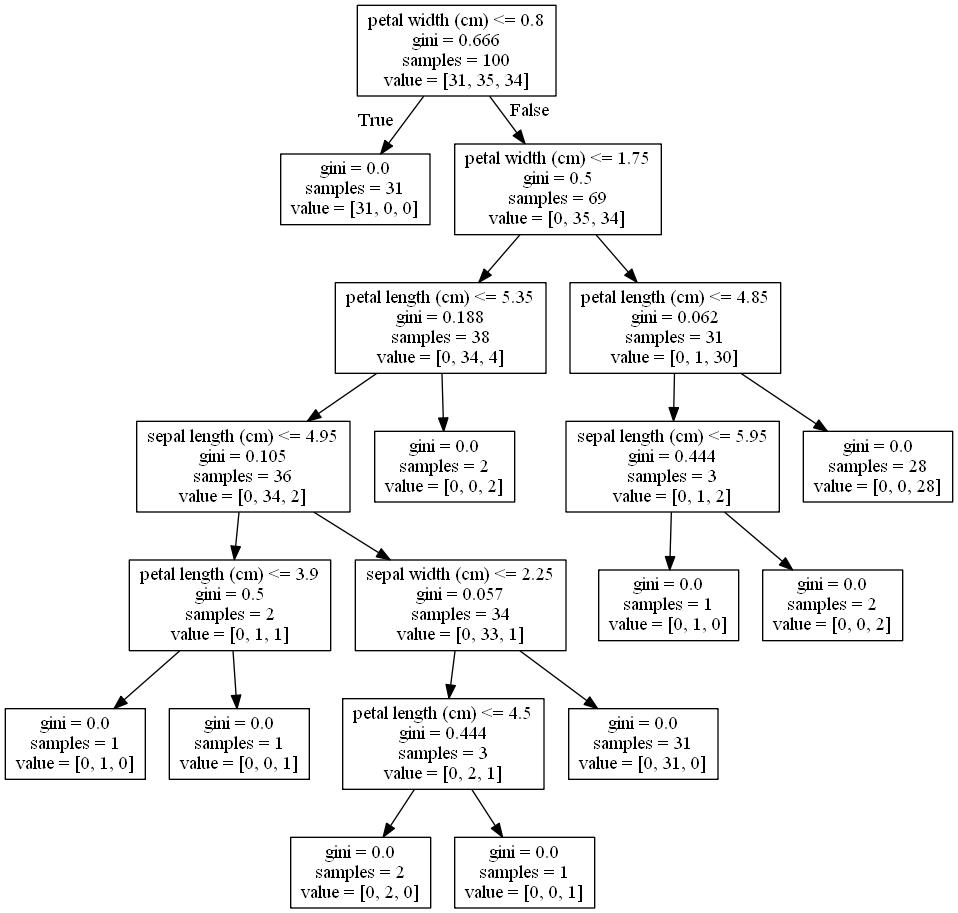